In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import balanced_accuracy_score

In [2]:
# Importing data
data_df = pd.read_csv("data/County_Merged.csv")
data_df

,StateDesc,CountyName,CountyFIPS,TotalPopulation,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,BINGE_AdjPrev,BPHIGH_CrudePrev,BPHIGH_AdjPrev,...,TEETHLOST_AdjPrev,Geolocation,Geo_QNAME,Geo_NAME,ORG_DENSITY,ORG_TOT_POP,ORG_TOT_POP1,ORG_URBANPOP,ORG_RURALPOP,RuralUrban
0,New Jersey,Warren,34041.0,105267.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11.5,POINT (-74.9967165 40.85716301),"Warren, New Jersey",Warren,295.6,105503.0,105503.0,65940.0,39563.0,Rural
1,Oklahoma,Jackson,40065.0,24530.0,23.5,23.0,13.6,13.6,34.5,34.1,...,18.8,POINT (-99.41467445 34.58811786),"Jackson, Oklahoma",Jackson,30.5,24467.0,24467.0,18432.0,6035.0,Rural
2,Illinois,Lawrence,17101.0,15678.0,27.9,25.6,20.4,21.5,35.4,33.3,...,17.2,POINT (-87.72684251 38.7203392),"Lawrence, Illinois",Lawrence,42.1,15666.0,15666.0,6509.0,9157.0,Rural
3,Kansas,Barton,20009.0,25779.0,27.7,23.7,15.4,17.1,37.2,32.9,...,17.2,POINT (-98.75632156 38.478934),"Barton, Kansas",Barton,28.7,25721.0,25721.0,17553.0,8168.0,Rural
4,Alaska,Anchorage,2020.0,288000.0,19.3,20.0,18.8,18.2,28.8,29.8,...,12.2,POINT (-149.1141071 61.1504589),"Anchorage, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Williamsburg City, Virginia",Williamsburg city,1655.2,14933.0,14933.0,14933.0,0.0,Urban
3285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Winchester City, Virginia",Winchester city,3040.5,28072.0,28072.0,28072.0,0.0,Urban
3286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Mcdowell, West Virginia",McDowell,32.9,17537.0,17537.0,2334.0,15203.0,Rural
3287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Fond Du Lac, Wisconsin",Fond du Lac,144.1,103698.0,103698.0,67198.0,36500.0,Rural


In [3]:
# dropping null values
data_df = data_df.dropna()

In [4]:
data_df["RuralUrban"].dtype

dtype('O')

In [5]:
# Display DF
data_df

,StateDesc,CountyName,CountyFIPS,TotalPopulation,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,BINGE_AdjPrev,BPHIGH_CrudePrev,BPHIGH_AdjPrev,...,TEETHLOST_AdjPrev,Geolocation,Geo_QNAME,Geo_NAME,ORG_DENSITY,ORG_TOT_POP,ORG_TOT_POP1,ORG_URBANPOP,ORG_RURALPOP,RuralUrban
1,Oklahoma,Jackson,40065.0,24530.0,23.5,23.0,13.6,13.6,34.5,34.1,...,18.8,POINT (-99.41467445 34.58811786),"Jackson, Oklahoma",Jackson,30.5,24467.0,24467.0,18432.0,6035.0,Rural
2,Illinois,Lawrence,17101.0,15678.0,27.9,25.6,20.4,21.5,35.4,33.3,...,17.2,POINT (-87.72684251 38.7203392),"Lawrence, Illinois",Lawrence,42.1,15666.0,15666.0,6509.0,9157.0,Rural
3,Kansas,Barton,20009.0,25779.0,27.7,23.7,15.4,17.1,37.2,32.9,...,17.2,POINT (-98.75632156 38.478934),"Barton, Kansas",Barton,28.7,25721.0,25721.0,17553.0,8168.0,Rural
5,Oklahoma,Stephens,40137.0,43143.0,30.4,25.7,12.0,13.5,41.3,36.0,...,20.6,POINT (-97.85149263 34.485439),"Stephens, Oklahoma",Stephens,49.6,43180.0,43180.0,24445.0,18735.0,Rural
6,West Virginia,Mingo,54059.0,23424.0,44.5,37.6,11.2,13.1,49.8,43.0,...,30.4,POINT (-82.13487448 37.7266469),"Mingo, West Virginia",Mingo,55.1,23322.0,23322.0,2385.0,20937.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Texas,Kerr,48265.0,52600.0,27.5,21.4,15.1,17.9,37.9,31.0,...,14.5,POINT (-99.34931972 30.06119206),"Kerr, Texas",Kerr,47.9,52872.0,52872.0,31113.0,21759.0,Rural
3137,Kentucky,Carter,21043.0,26797.0,39.4,34.1,13.0,14.6,46.3,41.0,...,27.7,POINT (-83.04983435 38.31844184),"Carter, Kentucky",Carter,65.3,26756.0,26756.0,5512.0,21244.0,Rural
3139,New York,Richmond,36085.0,476143.0,21.5,19.4,15.8,16.7,29.4,27.0,...,15.3,POINT (-74.15238026 40.58072907),"Richmond, New York",Richmond,8172.4,477025.0,477025.0,477025.0,0.0,Urban
3140,Kansas,Saline,20169.0,54224.0,25.9,22.9,16.6,17.9,32.8,29.6,...,14.1,POINT (-97.64993321 38.78398051),"Saline, Kansas",Saline,75.3,54203.0,54203.0,46326.0,7877.0,Rural


In [6]:
# Drop crude data
columns = data_df.columns
for column in columns:
    if "Crude" in column:
        data_df = data_df.drop(column, axis=1)
        


In [7]:
# Set features and target
X = data_df.drop(columns=["StateDesc", "CountyName", "CountyFIPS", "Geolocation",
                          "Geo_QNAME", "Geo_NAME", "RuralUrban", "RuralUrban"]).values
y = data_df["ARTHRITIS_AdjPrev"].values

In [8]:
X

array([[2.45300e+04, 2.30000e+01, 1.36000e+01, ..., 2.44670e+04,
        1.84320e+04, 6.03500e+03],
       [1.56780e+04, 2.56000e+01, 2.15000e+01, ..., 1.56660e+04,
        6.50900e+03, 9.15700e+03],
       [2.57790e+04, 2.37000e+01, 1.71000e+01, ..., 2.57210e+04,
        1.75530e+04, 8.16800e+03],
       ...,
       [4.76143e+05, 1.94000e+01, 1.67000e+01, ..., 4.77025e+05,
        4.77025e+05, 0.00000e+00],
       [5.42240e+04, 2.29000e+01, 1.79000e+01, ..., 5.42030e+04,
        4.63260e+04, 7.87700e+03],
       [6.99840e+04, 2.27000e+01, 1.90000e+01, ..., 7.07530e+04,
        1.95060e+04, 5.12470e+04]])

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

In [10]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train

array([[1.66370e+04, 2.27000e+01, 1.56000e+01, ..., 1.65880e+04,
        8.43100e+03, 8.15700e+03],
       [8.63500e+03, 2.67000e+01, 1.68000e+01, ..., 8.58700e+03,
        0.00000e+00, 8.58700e+03],
       [1.05450e+04, 2.43000e+01, 2.30000e+01, ..., 1.05520e+04,
        0.00000e+00, 1.05520e+04],
       ...,
       [2.09339e+05, 2.44000e+01, 1.57000e+01, ..., 2.11601e+05,
        1.01413e+05, 1.10188e+05],
       [2.36780e+04, 2.40000e+01, 2.50000e+01, ..., 2.37340e+04,
        4.74400e+03, 1.89900e+04],
       [3.13650e+04, 2.88000e+01, 1.95000e+01, ..., 3.14070e+04,
        1.37960e+04, 1.76110e+04]])

In [12]:
y_train

array([22.7, 26.7, 24.3, ..., 24.4, 24. , 28.8])

In [13]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test_scaled)

In [15]:
Accuracy = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 100.00


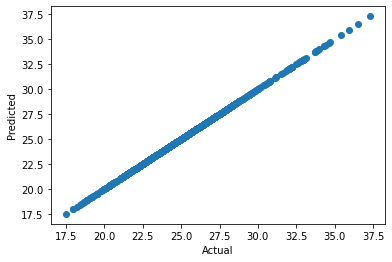

In [16]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [17]:
# set testing data again
X = data_df.drop(columns=["StateDesc", "CountyName", "CountyFIPS", "Geolocation",
                          "Geo_QNAME", "Geo_NAME", "RuralUrban", "RuralUrban"]).values
y = data_df["RuralUrban"]

In [18]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
y_transformed

array([0, 0, 0, ..., 1, 0, 0])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

In [20]:
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf_model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [21]:
y_pred = brf_model.predict(X_test)
acc_score = balanced_accuracy_score(y_test, y_pred)
acc_score

0.9970972423802613